In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [2]:
data={
    'student':['a','b','c','d','e','f'],

    'marks':[80,30,70,20,60,50],
    "result":["pass","fail","pass","fail","pass","pass"]
}

In [3]:
df=pd.DataFrame(data)
print("Original Data:")
print(df)

Original Data:
  student  marks result
0       a     80   pass
1       b     30   fail
2       c     70   pass
3       d     20   fail
4       e     60   pass
5       f     50   pass


In [4]:
le=LabelEncoder()
df['result'] = le.fit_transform(df["result"])

In [5]:
x= df[['marks']].values
y=df["result"].values

In [6]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=42)

In [7]:
model = LogisticRegression()


In [8]:

model.fit(x_train,y_train)

LogisticRegression()

In [9]:
y_pred =model.predict(x_test)

In [10]:
accuracy = accuracy_score(y_test,y_pred)
conf_mat= confusion_matrix(y_test,y_pred)
class_report=classification_report(y_test,y_pred)

In [11]:
print("\n Predicted values:",y_pred)
print("\n Accuracy Score:",accuracy)
print("\n Confusion Matrix:\n",conf_mat)
print("\n classification report:\n",class_report)


 Predicted values: [1 0]

 Accuracy Score: 1.0

 Confusion Matrix:
 [[1 0]
 [0 1]]

 classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [12]:
new_pred=model.predict([[65]])
print(f"\nPrediction for marks=65:{'pass' if new_pred[0]==1 else 'fail'}")


Prediction for marks=65:pass


In [13]:
x_range = np.linspace(min(x)-5,max(x)+5,100).reshape(-1,1)
y_prob =model.predict_proba(x_range)[:,1]

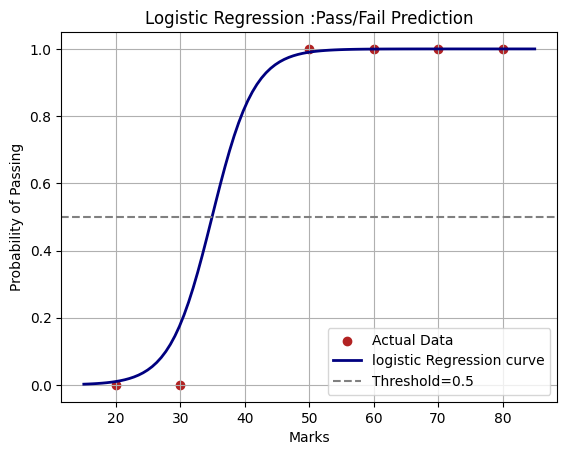

In [30]:
plt.scatter(x,y,color="firebrick",label="Actual Data")
plt.plot(x_range,y_prob,color="navy",linewidth=2,label="logistic Regression curve")
plt.title("Logistic Regression :Pass/Fail Prediction")
plt.xlabel("Marks")
plt.ylabel("Probability of Passing")
plt.axhline(0.5,color="grey",linestyle="--",label="Threshold=0.5")
plt.legend()
plt.grid(True)
plt.show()